Link para a base de dados:

In [5]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
#Ler os dados

Base_dados = pd.read_csv("/content/unicorns till sep 2022.csv")

#Verificar tamanho da Base
Base_dados.shape

(1186, 7)

In [ ]:
# Primeiros registros
Base_dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [10]:
Base_dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [11]:
#Renomear
Base_dados.rename(columns ={"Unnamed: 0" : "Id", "Company" : "Empresa",
                           "Valuation ($B)": "Valor ($)", "Date Joined": "Data de Adesão" , "Country" : "Pais", "City" : "Cidade" , "Industry" : "Setor",
                           "Investors" : "Investidores"}, inplace = True)

In [12]:
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [13]:
#Verificar dentro da base se existem campos não nulos e se sim quais são
Base_dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investidores      18
dtype: int64

<Axes: title={'center': 'Campos nulos'}>

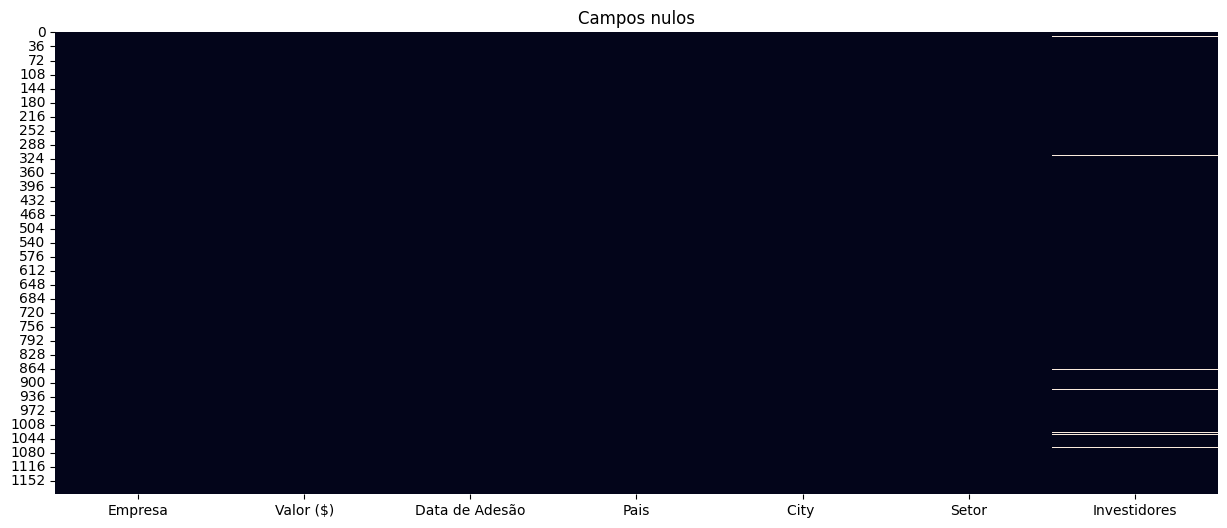

In [14]:
 #Representação gráfica do que fizemos acima em um mapa de calor
 plt.figure(figsize = (15,6))
 plt.title("Campos nulos")
 sns.heatmap( Base_dados.isnull(),cbar = False)

In [15]:
#Campos unicos
Base_dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investidores      1152
dtype: int64

In [16]:
#Valores Unicos que aparecem em setor
Base_dados["Setor"].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [17]:
#Número de vezes que esses valores aparecem em setor
Base_dados["Setor"].value_counts()
#Se passar o parâmetro normalize = True ele mostra a porcentagem

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

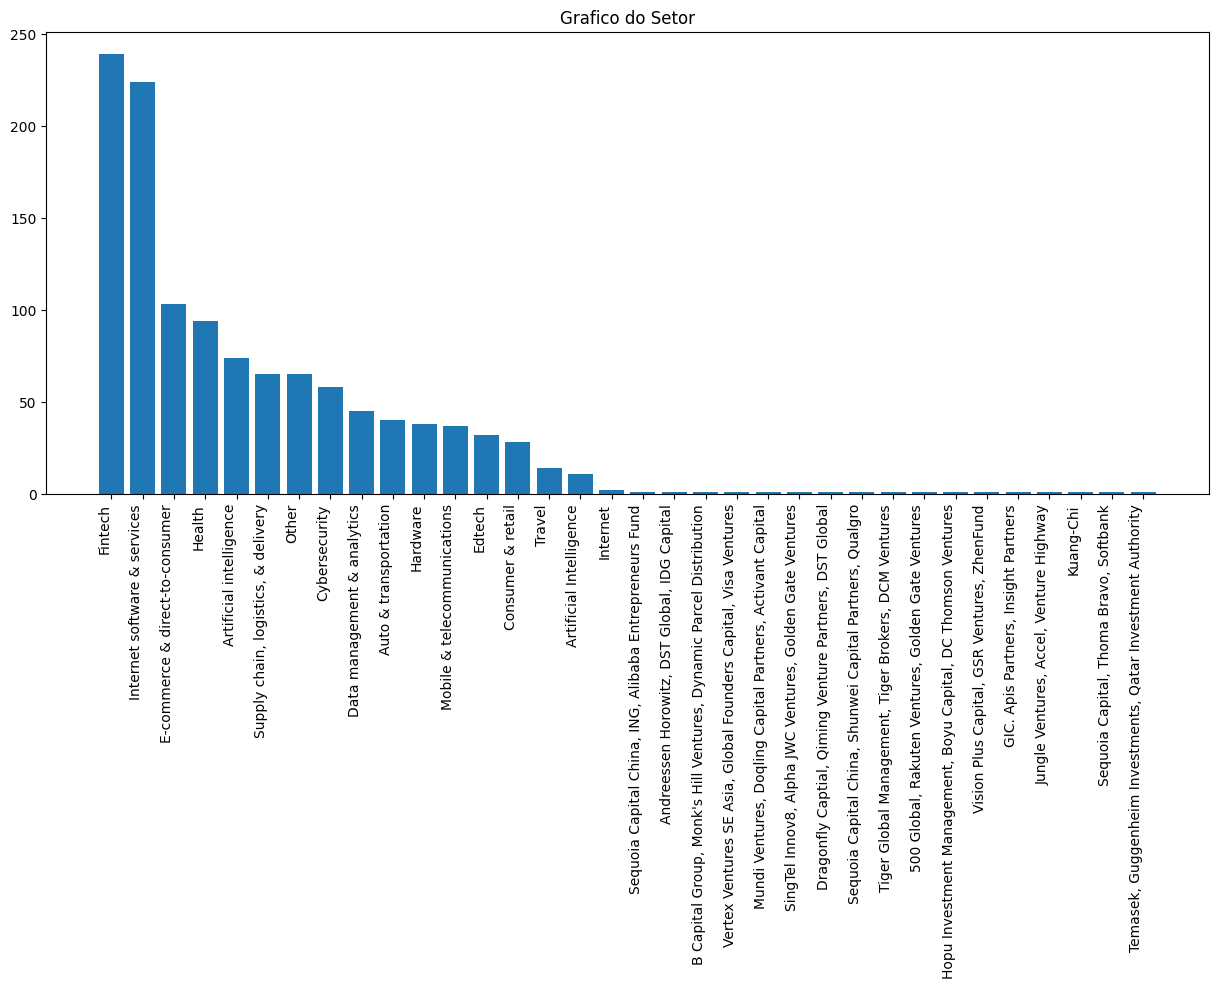

In [20]:
 plt.figure(figsize = (15,6))
 plt.title("Grafico do Setor")
 plt.bar(Base_dados["Setor"].value_counts().index, Base_dados["Setor"].value_counts())
 plt.xticks(rotation = 90, ha ="right");

In [26]:
#analisando os paises e verificando a porcentagem
Analise = round(Base_dados["Pais"].value_counts(normalize = True) * 100, 1)
Analise

United States           53.6
China                   14.7
India                    5.9
United Kingdom           3.9
Germany                  2.4
France                   2.0
Israel                   1.9
Canada                   1.6
Brazil                   1.4
South Korea              1.4
Singapore                1.1
Sweden                   0.7
Mexico                   0.7
Australia                0.7
Indonesia                0.6
Netherlands              0.6
Hong Kong                0.6
Ireland                  0.5
Japan                    0.5
Switzerland              0.5
Norway                   0.4
Finland                  0.3
Spain                    0.3
Turkey                   0.3
Colombia                 0.3
Belgium                  0.3
United Arab Emirates     0.3
Austria                  0.2
Lithuania                0.2
Vietnam                  0.2
Thailand                 0.2
Estonia                  0.2
Chile                    0.2
Denmark                  0.2
Philippines   

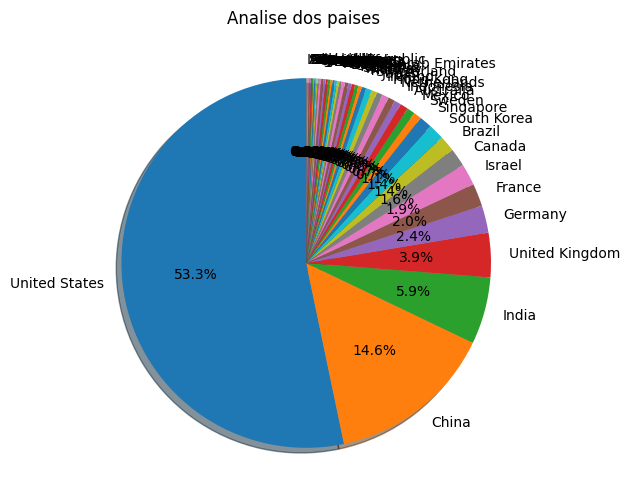

In [30]:
#plot geral dos paises
plt.figure(figsize = (15,6))
plt.title("Analise dos paises ")
plt.pie(Analise, labels = Analise.index,
        shadow = True,
        startangle = 90,
        autopct = "%1.1f%%");

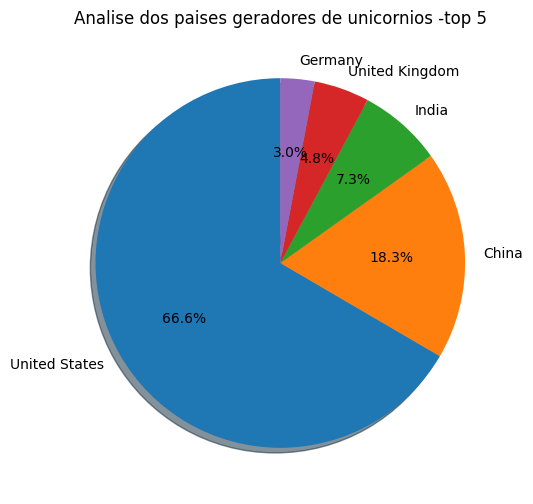

In [33]:
plt.figure(figsize = (15,6))
plt.title("Analise dos paises geradores de unicornios -top 5")
plt.pie(Analise.head(5), labels = Analise.index[0:5],
        shadow = True,
        startangle = 90,
        autopct = "%1.1f%%");

In [34]:
#Convertendo os valores objetos para data
Base_dados["Data de Adesão"] = pd.to_datetime(Base_dados["Data de Adesão"])
Base_dados["Data de Adesão"].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [37]:
#Extraindo o ano e Mês
Base_dados["Mes" ] = pd.DatetimeIndex(Base_dados["Data de Adesão"]).month
Base_dados["Ano"] = pd.DatetimeIndex(Base_dados["Data de Adesão"]).year
Base_dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [57]:
# Criando uma tabela Analitica
Analise_Agrupada = Base_dados[["Pais", "Ano", "Mes", "Empresa"]]
Analise_Agrupada

,Pais,Ano,Mes,Empresa
0,China,2017,4,ByteDance
1,United States,2012,12,SpaceX
2,China,2018,7,SHEIN
3,United States,2014,1,Stripe
4,Australia,2018,1,Canva
...,...,...,...,...
1181,India,2022,6,LeadSquared
1182,United States,2022,6,FourKites
1183,United States,2022,7,VulcanForms
1184,United States,2022,7,SingleStore


In [60]:
#Mostrando apenas o Brasil
Analise_Agrupada.loc[
    Analise_Agrupada["Pais"] == 'Brazil'
]

,Pais,Ano,Mes,Empresa
132,Brazil,2019,9,QuintoAndar
133,Brazil,2020,12,C6 Bank
158,Brazil,2020,12,Creditas
283,Brazil,2021,8,Nuvemshop
291,Brazil,2019,12,Wildlife Studios
323,Brazil,2020,1,Loft
350,Brazil,2021,8,Unico
423,Brazil,2021,9,CloudWalk
470,Brazil,2019,6,Loggi
643,Brazil,2021,12,Olist


In [68]:
#Apply é uma função onde eu posso percorrer dentro da base de dados e mudar alguma coisa
#no caso aqui eu apaguei o sinal de $ para poder transformar em numerico
Base_dados["Valor ($)"] = pd.to_numeric(Base_dados["Valor ($)"].apply(lambda Linha: Linha.replace("$", "")))
Base_dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [102]:
Analise_Pais = Base_dados[["Pais", "Valor ($)"]]
soma_por_pais = Analise_Pais.groupby("Pais")["Valor ($)"].sum()
soma_por_pais


Pais
Argentina                  2.45
Australia                 54.40
Austria                    7.61
Bahamas                   32.00
Belgium                    8.95
Bermuda                    1.60
Brazil                    40.08
Canada                    49.23
Chile                      2.50
China                    678.59
Colombia                   7.40
Croatia                    3.00
Czech Republic             1.20
Denmark                    6.70
Ecuador                    1.50
Estonia                    9.90
Finland                   12.46
France                    58.42
Germany                   80.88
Hong Kong                 20.35
India                    202.92
Indonesia                 29.13
Ireland                   10.05
Israel                    48.02
Italy                      1.00
Japan                      8.82
Lithuania                  6.13
Luxembourg                 2.00
Malaysia                   1.70
Mexico                    18.70
Netherlands               22.46
Nig

In [103]:
soma_por_pais_ordenado = soma_por_pais.sort_values(ascending=False)
soma_por_pais_ordenado

Pais
United States           2069.89
China                    678.59
United Kingdom           205.45
India                    202.92
Germany                   80.88
France                    58.42
Australia                 54.40
Canada                    49.23
Israel                    48.02
Brazil                    40.08
South Korea               34.13
Bahamas                   32.00
Indonesia                 29.13
Sweden                    23.62
Netherlands               22.46
Singapore                 20.75
Hong Kong                 20.35
Mexico                    18.70
Turkey                    15.77
Finland                   12.46
Switzerland               12.30
Ireland                   10.05
Seychelles                10.00
Estonia                    9.90
Belgium                    8.95
Japan                      8.82
Austria                    7.61
Colombia                   7.40
Denmark                    6.70
Spain                      6.15
Lithuania                  6.13
Nor

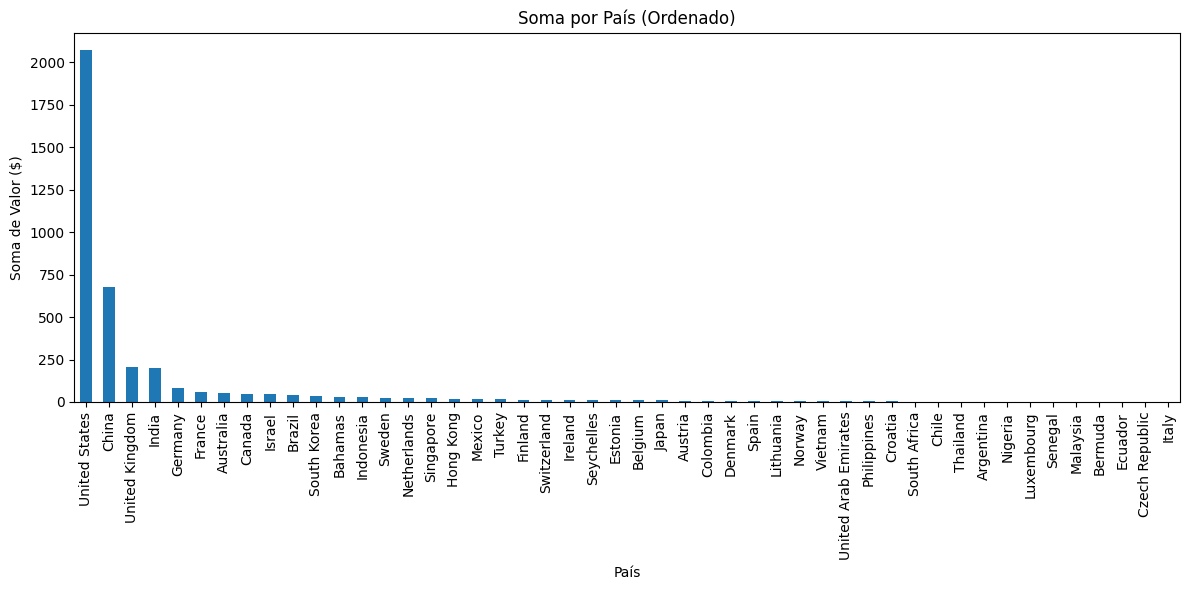

In [113]:
plt.figure(figsize=(12, 6))
soma_por_pais_ordenado.plot(kind='bar')

plt.xlabel('País')
plt.ylabel('Soma de Valor ($)')
plt.title('Soma por País (Ordenado)')

plt.tight_layout()  # Garante que os rótulos não se sobreponham

plt.show()